# Cat&Dog Classifier

In [1]:
# use opencv to load and display the image
import os
import cv2
import matplotlib.pyplot as plt

from natsort import natsorted
import numpy as np
import pygwalker as pyg

In [2]:
cat_dir = natsorted(os.listdir('res/dataset_c&d/cat'))
dog_dir = natsorted(os.listdir('res/dataset_c&d/dog'))

X_data, y_data = [], []
class_names = ['Cat', 'Dog']

### Data Processing

In [ ]:
def img2vec(img):
    """
        Process `img` by resizing it to 150x150, by normalizing the pixel values to a range [0, 1],
        and by flattening the matrice to a vector.
    """

    resized = cv2.resize(img, (150, 150))
    normalized = resized.astype(np.float16) / 255.0
    return normalized.flatten()

# Loop through cat/dog folders to build X_data, and y_data
for dir, cat in zip([cat_dir, dog_dir], [0, 1]):
    for file in dir:
        img = cv2.imread(f'res/{ 'cat' if cat == 0 else 'dog' }/{file}', cv2.IMREAD_COLOR)
        if img is not None:
            X_data.append(img2vec(img))
            y_data.append(cat)

# Saves the processed data to .npy files
np.save('res/X_data.npy', X_data)
np.save('res/y_data.npy', y_data)

In [3]:
# Loads the stored data
X_data = np.load('res/X_data.npy')
y_data = np.load('res/y_data.npy')

### DataViz

In [4]:
print(f'--cats&dogs-length: { len(cat_dir) + len(dog_dir) }')
print(f'--X-data-length: { len(X_data) }')
print(f'--corrupted: { (len(cat_dir) + len(dog_dir)) - len(X_data) }')

--cats&dogs-length: 25002
--X-data-length: 24946
--corrupted: 56


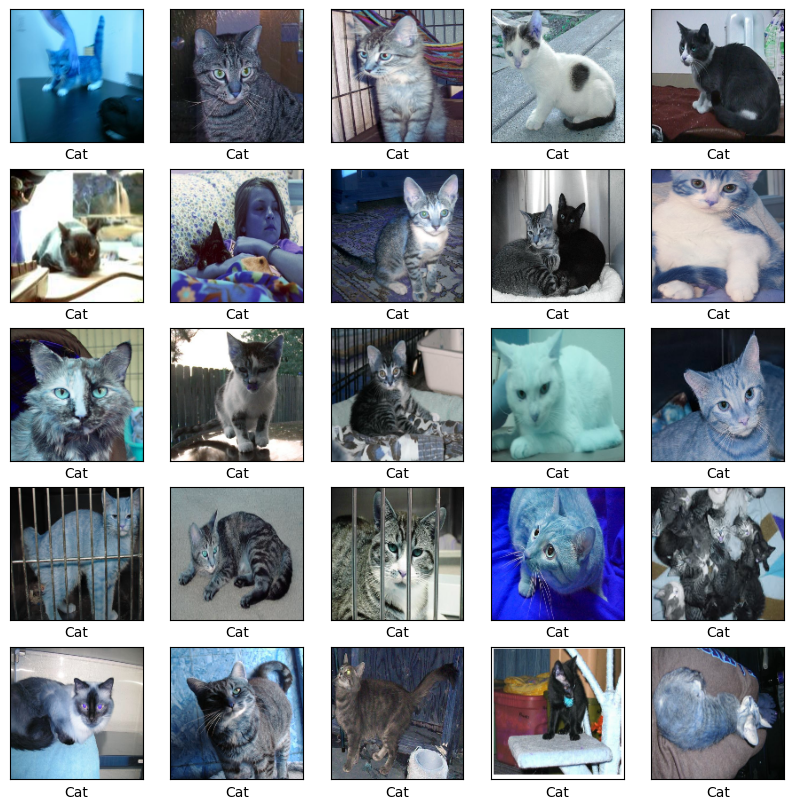

In [5]:
def vec2img(vectorized):
    scaled = vectorized * 255.0
    converted  = scaled.astype(np.uint8)
    reshaped = converted.reshape(150, 150, 3)
    return reshaped

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vec2img(X_data[i]))
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_data[i]])
plt.show()

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

## Machine Learning (RandomForest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Neural Network

In [7]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

input_shape = (150, 150, 3)
hidden_dim = 128
output_dim = 1


2024-04-11 16:44:38.575019: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 16:44:38.576097: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 16:44:38.578209: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 16:44:38.605785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 16:44:39.634332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [8]:
model = Sequential([
    Dense(hidden_dim, activation='relu'),
    Dropout(0.2),
    Dense(hidden_dim, activation='relu'),
    Dropout(0.2),
    Dense(output_dim, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))